### Imports

In [34]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pathlib
import pprint

# Geocoding
from geopy.geocoders import Nominatim, GoogleV3

# Magic Methods for Jupyter Notebooks
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Natural Earth Shapefiles

[Source of Data](https://www.naturalearthdata.com/downloads/)

Reading the .shp files inside the downloaded folder

In [35]:
# Jupyter automatically pretty prints, but I want to use this for later
pp = pprint.PrettyPrinter()

In [36]:
NATURAL_EARTH_BASEPATH =  "/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural"
natural_earth = pathlib.Path(NATURAL_EARTH_BASEPATH)

shp_files = list(natural_earth.glob("*.shp"))
pp.pprint(shp_files)

[PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_admin_1_states_provinces_lines.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_admin_0_sovereignty.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_admin_0_scale_rank.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_admin_1_states_provinces.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_admin_0_map_units.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_admin_1_states_provinces_lakes.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_populated_places.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_cultural/ne_110m_admin_0_pacific_groupings.shp'),
 PosixPath('/home/therealmolf/nass_agri_dash/data/natural_earth/110m_

Basic Inspection of the GeoDataFrames

<Axes: >

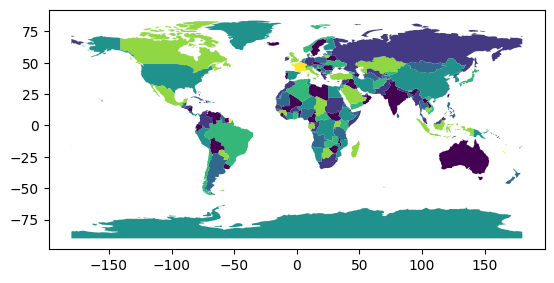

In [83]:
map_units = gpd.read_file(shp_files[4])

# Sample Chloropeth Map
map_units.plot(column="MAPCOLOR7")

In [68]:
map_units.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int64(25), object(137)
memory usage: 241.7+ KB


In [81]:
pp.pprint(list(map_units.columns)[:20:-4])

['geometry', 'FCLASS_ISO', 'HOMEPART', 'ADM0_A3_NP', 'MAPCOLOR7']


In [88]:
pacific_groupings = gpd.read_file(shp_files[7])
pacific_groupings.head()

,scalerank,featurecla,geometry
0,2,Pacific Groupings,"LINESTRING (147.99693 13.82167, 147.99693 14.3..."
1,2,Pacific Groupings,"LINESTRING (147.99693 13.82167, 147.99693 13.3..."
2,2,Pacific Groupings,"LINESTRING (-150.00002 -8.00063, -150.00006 -8..."
3,2,Pacific Groupings,"LINESTRING (-180.00000 0.00090, -178.99996 0.0..."
4,2,Pacific Groupings,"LINESTRING (172.99668 -25.99999, 172.18433 -25..."


In [ ]:
tiny_countries = gpd.read_file(shp_files[10])
tiny_countries.head()

In [105]:
tiny_countries.columns[:20:-3]

Index(['geometry', 'FCLASS_SE', 'FCLASS_GR', 'FCLASS_TR', 'FCLASS_JP',
       'FCLASS_MA', 'FCLASS_PS', 'FCLASS_GB', 'FCLASS_NP', 'FCLASS_CN',
       'FCLASS_FR', 'TLC_DIFF', 'NAME_ZH', 'NAME_UK', 'NAME_RU', 'NAME_NL',
       'NAME_IT', 'NAME_HI', 'NAME_FR', 'NAME_EN', 'NAME_AR', 'LABEL_Y',
       'MIN_LABEL', 'TINY', 'NAME_LEN', 'REGION_UN', 'ADM0_A3_UN',
       'ADM0_A3_SE', 'ADM0_A3_GR', 'ADM0_A3_TR', 'ADM0_A3_JP', 'ADM0_A3_MA',
       'ADM0_A3_PS', 'ADM0_A3_GB', 'ADM0_A3_NP', 'ADM0_A3_CN', 'ADM0_A3_FR',
       'ADM0_DIFF', 'WOE_ID_EH', 'WB_A2', 'ISO_N3', 'ISO_A2_EH', 'INCOME_GRP',
       'GDP_MD', 'POP_EST', 'MAPCOLOR8', 'NAME_SORT', 'NAME_CIAWF', 'POSTAL',
       'BRK_NAME'],
      dtype='object')

In [ ]:
states_provinces_lines = gpd.read_file(shp_files[0])
states_provinces_lines.plot()

### Testing Spatial Joins on Geopandas

Notes about Spatial Joins:
* You want to have matching CRS by using to_crs()
* First GeoDataFrame arg is the one that gets to keep its geometry column
* left join keeps even the ones that do not have a value, inner join removes
* op is going to be deprecated; use predicate instead

In [59]:
map_units.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [110]:
tiny_countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

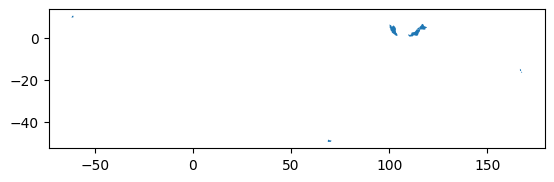

In [109]:
gpd.sjoin(map_units, tiny_countries, how="inner", predicate="intersects").plot()